
# WeRateDogs Project

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Gathering">Gathering</a></li>
<li><a href="#Assessing">Assessing</a></li>
<li><a href="#Cleaning">Cleaning</a></li>
</ul>

## Gather  
- Online data (Twitter and Udacity server)
- Stored files(csv file)
    

In [1]:
import pandas as pd
import json
import csv
import re
import tweepy
from tweepy import OAuthHandler
import time
from urllib import request
import matplotlib 

In [458]:
#download image prediction file in url programmatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
 
def download_txturl(txturl):
    response = request.urlopen(txturl)
    txt = response.read()
    txtstr = str(txt)
    lines = txtstr.split('\\n')
    dest = r'image_predictions.tsv'
    op = open(dest, 'w')
    for line in lines:
        op.write(line + '\n')
    op.close()

download_txturl(url)


In [459]:
consumer_key = 'jbL7N3K4eXgD1zhDfeS2TcnFr'
consumer_secret = 'XeIpJqZ4i8WAolHVCNBqGtILZKY1J0TVJw8GkpW9jDRthls1qn'
access_token = '495295426-3dc2rEDWSI8AX8NxYCpIRV9tk83EwocP7RzbraDC'
access_token_secret = 'zsulnNzoCcHRURBOkfVkb1tLcJPfYinSwfJBpn9Nam1FV'


# search_favorites(consumer_key, consumer_secret, access_token, access_token_secret):
#create authentication for accessing twitter
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

#initialize Tweepy API
api = tweepy.API(auth, wait_on_rate_limit =True, wait_on_rate_limit_notify = True)
tweet_ids = df_archive.tweet_id


In [460]:
count = 0
fails_dict = {}
#save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    
    #loop through each tweet id filtered by the given archive file and write to outfile
    for tweet_id in tweet_ids:
        count += 1        
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
            
        except tweepy.TweepError as e:
            fails_dict[tweet_id] = e
            pass

Rate limit reached. Sleeping for: 467


In [12]:
df_new = pd.DataFrame(columns=['tweet_id', 'text','retweet_count', 'favorite_count'])
with open('tweet_json.txt') as f:
    for line in f:
        status  = json.loads(line)
        tweet_id = status['id_str']
        text = status['full_text']
        retweet_count = status['retweet_count']
        favorite_count = status['favorite_count']
        df_new = df_new.append(pd.DataFrame([[tweet_id, text, retweet_count, favorite_count]],
                                        columns=['tweet_id', 'text', 'retweet_count', 'favorite_count']))
df_new = df_new.reset_index(drop=True)

In [13]:
df_new.head()

,tweet_id,text,retweet_count,favorite_count
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,8192,37558
1,892177421306343426,This is Tilly. She's just checking pup on you....,6059,32280
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,4008,24320
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,8347,40906
4,891327558926688256,This is Franklin. He would like you to stop ca...,9040,39101


In [14]:
df_archive = pd.read_csv('twitter-archive-enhanced-2.csv')
df_image = pd.read_csv('image-predictions-3.tsv',  delimiter='\t')

## Assess


#### Quality
##### archive table
- Missing data for retweets and likes
- Incorrect ratings data and unnusable values
    - strange values
    - 75 should be 9.75
    - 1776, 420, high values will skew analysis
- Erroneous data types (ID, ratings, favorite_count, retweet_count, timestamp) 
- Retweets and reply-to tweets need to be removed
- Retweets and reply-to columns need to be removed
- Rows without images need to be removed
- Erroneous names
- Source column is hard to understand



##### image prediction table
- results that are not dogs should be removed
- Erroneous datatypes (tweet_id)
- Lowercase given names and surnames

#### Tidiness
##### archive table
- There should be one column for dog stages
- There should be one column for dog breed, and it should be connected to the archive table
- There should be one columns for rating 
- rows with more than one rating should be removed (multiple observations within one row)



## Clean

### Missing data:
- The likes and retweet counts will be added. The archive and new dataframes are combined with an inner join. This will exclude values from the archive that are no longer present. This will be easier if the tweet IDs are strings. 
    

In [15]:
df_new2 = df_new.copy()
df_archive2 = df_archive.copy()
df_image2 = df_image.copy()

In [16]:
df_new2.tweet_id = df_new2['tweet_id'].astype('str')
df_archive2.tweet_id = df_archive2.tweet_id.astype('str')
df_new2.head()

,tweet_id,text,retweet_count,favorite_count
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,8192,37558
1,892177421306343426,This is Tilly. She's just checking pup on you....,6059,32280
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,4008,24320
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,8347,40906
4,891327558926688256,This is Franklin. He would like you to stop ca...,9040,39101


In [17]:
df_clean = df_archive2.merge(df_new2, how= 'inner', on = 'tweet_id')
df_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text_x,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,text_y,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,This is Phineas. He's a mystical boy. Only eve...,8192,37558
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,This is Tilly. She's just checking pup on you....,6059,32280
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,This is Archie. He is a rare Norwegian Pouncin...,4008,24320


### Unnecessary columns/data
 - Retweets and rows are removed by removing rows that contain a value in retweet-status and in-reply-to columns and those that do not contain photos. Excess columns are removed

In [18]:
# Rows with other than null values in retweeted and in_reply_to columns are dropped from the dataset
df_clean = df_clean[(df_clean['retweeted_status_id'].isna()) & (df_clean['in_reply_to_status_id'].isna())]

In [19]:
# the old text will be replaced by my newly collected text as it will be used later and I want to be sure of its correctness
df_clean.drop('text_x', axis = 1, inplace = True)

In [20]:
#the name is changed back to 'text'
df_clean.rename(columns = {'text_y': 'text'}, inplace = True)

In [21]:
#tweets without a photo are also dropped
df_clean = df_clean[df_clean.text.str.contains("https://")]

In [22]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,text,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,This is Phineas. He's a mystical boy. Only eve...,8192,37558
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,This is Tilly. She's just checking pup on you....,6059,32280
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,This is Archie. He is a rare Norwegian Pouncin...,4008,24320
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,This is Darla. She commenced a snooze mid meal...,8347,40906
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,This is Franklin. He would like you to stop ca...,9040,39101


In [23]:
#Unnecessary columns are removed.
df_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'rating_denominator', 'in_reply_to_status_id', 'in_reply_to_user_id'],  axis =1, inplace = True )

In [24]:
# check for any remaing text columns containing RT. The resulting rows are not retweets.
df_clean[df_clean.text.str.contains('RT ')]

,tweet_id,timestamp,source,expanded_urls,rating_numerator,name,doggo,floofer,pupper,puppo,text,retweet_count,favorite_count


### Stage variable tidying
  - re-extract, join, and delete excess columns

In [25]:
#stages are extracted again from the text column
df_clean['stage'] = df_clean.text.str.findall(r'(doggo|floofer|pupper|puppo)')


In [26]:
df_clean.stage

0            []
1            []
2            []
3            []
4            []
5            []
6            []
7            []
8            []
9       [doggo]
10           []
11           []
12      [puppo]
13           []
14      [puppo]
15           []
16           []
17           []
18           []
19           []
20           []
21           []
22           []
23           []
24           []
25           []
26           []
27           []
28     [pupper]
30           []
         ...   
379          []
380          []
381          []
382     [puppo]
383          []
385     [puppo]
387          []
388          []
389    [pupper]
390          []
391          []
392          []
394          []
395          []
397          []
399          []
400     [puppo]
401          []
403          []
404          []
405    [pupper]
406          []
408          []
410     [doggo]
411          []
413     [doggo]
415          []
416     [doggo]
417          []
419          []
Name: stage, Length: 336

In [27]:
# the new stage column is a list. The few columns with double entries are separated with a comma and all values become strings. 
df_clean['stage'] = df_clean['stage'].str.join(',')


In [28]:
#test
df_clean.stage.value_counts()

               273
doggo           28
pupper          20
puppo           12
puppo,doggo      2
floofer          1
Name: stage, dtype: int64

In [29]:
# A forward slash replaces the comma for visual purposes
df_clean.stage = df_clean.stage.str.replace(',', '/')

In [30]:
#replecated stages are removed
df_clean['stage'].replace('pupper/pupper', 'pupper', inplace =True) 
df_clean['stage'].replace('pupper/doggo/doggo', 'pupper/doggo', inplace = True) 
df_clean['stage'].replace('pupper/pupper/pupper', 'pupper', inplace = True) 

In [61]:
# Excess columns are removed
df_clean2 = df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis =1)

In [62]:
df_clean2.stage.value_counts()

               273
doggo           28
pupper          20
puppo           12
puppo/doggo      2
floofer          1
Name: stage, dtype: int64

### Correction of ratings
  - Re-extract ratings and remove outliers. 

In [63]:
#A regular expression is used to find all ratings
df_clean2['rating'] = df_clean2['text'].str.findall(r'(\d+/10)')
df_clean2.rating.value_counts()

[13/10]    157
[12/10]    119
[11/10]     27
[14/10]     25
[10/10]      5
[0/10]       1
[6/10]       1
[5/10]       1
Name: rating, dtype: int64

In [64]:
# rows with multiple ratings or no ratings are removed

df_clean2 = df_clean2[(df_clean2['rating'].str.len() < 2) & (df_clean2['rating'].str.len() > 0)]
df_clean2.head(1)

,tweet_id,timestamp,source,expanded_urls,rating_numerator,name,text,retweet_count,favorite_count,stage,rating
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892420643...,13,Phineas,This is Phineas. He's a mystical boy. Only eve...,8192,37558,,[13/10]


In [65]:
#the value is selected from the list so that it is no more in list format
df_clean2['rating'] = df_clean2['rating'].apply(lambda x: x[0])

In [66]:
df_clean2.head()

,tweet_id,timestamp,source,expanded_urls,rating_numerator,name,text,retweet_count,favorite_count,stage,rating
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892420643...,13,Phineas,This is Phineas. He's a mystical boy. Only eve...,8192,37558,,13/10
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892177421...,13,Tilly,This is Tilly. She's just checking pup on you....,6059,32280,,13/10
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891815181...,12,Archie,This is Archie. He is a rare Norwegian Pouncin...,4008,24320,,12/10
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891689557...,13,Darla,This is Darla. She commenced a snooze mid meal...,8347,40906,,13/10
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891327558...,12,Franklin,This is Franklin. He would like you to stop ca...,9040,39101,,12/10


In [67]:
# The rating column is split again to extract the numerator 
#df_clean2.rating = df_clean2.rating.str.split('/')

In [68]:
# The numerator is selected
df_clean2.rating = df_clean2['rating'].str.extract('(^\d+)')

In [69]:
df_clean2.rating = df_clean2.rating.astype(float)

In [70]:
# New rating results is compared to the given rating result for exploration of differences. 
df_clean2.query('rating != rating_numerator')

,tweet_id,timestamp,source,expanded_urls,rating_numerator,name,text,retweet_count,favorite_count,stage,rating


In [71]:
#The original rating numerator column is removed
df_clean2.drop('rating_numerator', axis =1, inplace =True)

In [72]:
# Outliers are removed
df_clean2 = df_clean2.query('rating <20')

### Breeds should be one column
 - The image prediction data set is cleaned so there is one value per tweet, then added to the main table

In [73]:
#new data frames are created that will designate the most likely dog breed for each tweet. Predictions where no result was a 
#dog breed are removed. 
df_1 = df_image2.query('p1_dog == True')
df_2 = df_image2.query('p1_dog != True & p2_dog == True')
df_3 = df_image2.query('p1_dog != True & p2_dog != True & p3_dog == True')

df_1['breed'] = df_1['p1']
df_2['breed'] = df_2['p2']
df_3['breed'] = df_3['p3']
len(df_1) + len(df_2) + len(df_3)
len(df_image)

C:\Users\Summer\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Summer\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Summer\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/inde

2075

In [74]:
# The new dataframes are concatenated into one. 
image_clean = pd.concat([df_1, df_2, df_3], axis=0, join='outer', join_axes=None, ignore_index=True,
          keys=None, levels=None, names=None, verify_integrity=False,
          copy=True)
# All columns except the new breed column and the twitter ID are removed. 
image_clean = image_clean[['tweet_id','breed']]
image_clean.head()

,tweet_id,breed
0,666020888022790149,Welsh_springer_spaniel
1,666029285002620928,redbone
2,666033412701032449,German_shepherd
3,666044226329800704,Rhodesian_ridgeback
4,666049248165822465,miniature_pinscher


In [75]:
# The tweet_id data types are changed to strings so the tables can be merged
image_clean = image_clean.astype(str, copy=True)
# The dataframes are merged so that there is now a breed column in the main dataframe. Tweets with no reasonable prediction will
#now have null values.
df_clean2 = df_clean2.merge(image_clean, how = 'left', on = 'tweet_id')
df_clean2.info()
df_clean2.tweet_id.duplicated().any()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336 entries, 0 to 335
Data columns (total 11 columns):
tweet_id          336 non-null object
timestamp         336 non-null object
source            336 non-null object
expanded_urls     336 non-null object
name              336 non-null object
text              336 non-null object
retweet_count     336 non-null object
favorite_count    336 non-null object
stage             336 non-null object
rating            336 non-null float64
breed             287 non-null object
dtypes: float64(1), object(10)
memory usage: 31.5+ KB


False

### Miscelaneous cleaning 
 - name corrections, source value simplification, datatype corrections, addition of days of the week column

In [76]:
df_clean2.head()

,tweet_id,timestamp,source,expanded_urls,name,text,retweet_count,favorite_count,stage,rating,breed
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892420643...,Phineas,This is Phineas. He's a mystical boy. Only eve...,8192,37558,,13.0,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892177421...,Tilly,This is Tilly. She's just checking pup on you....,6059,32280,,13.0,Chihuahua
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891815181...,Archie,This is Archie. He is a rare Norwegian Pouncin...,4008,24320,,12.0,Chihuahua
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891689557...,Darla,This is Darla. She commenced a snooze mid meal...,8347,40906,,13.0,Labrador_retriever
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891327558...,Franklin,This is Franklin. He would like you to stop ca...,9040,39101,,12.0,basset


In [77]:
#Many of the erroneous names have been removed by the other filtering processes above. The ones remaining are "quite" and "a". 
#The dog with the name "a" has an instgram name of "Puffie the Chow". 

df_clean2.loc[df_clean2['name'] == "", 'name'] = "puffie_the_chow"
df_clean2.query('name =="puffie_the_chow"')

,tweet_id,timestamp,source,expanded_urls,name,text,retweet_count,favorite_count,stage,rating,breed


In [78]:
#The names with "quite" were not given a name in the text so are given the value of the string "none".
df_clean2.query('name =="quite"')
df_clean2.loc[df_clean2['name'] == "quite", 'name'] = "None"
df_clean2.name.value_counts()

None        77
Charlie      5
Tucker       3
Boomer       3
Stanley      3
Daisy        3
Lucy         2
Albus        2
Waffles      2
Penny        2
Paisley      2
Zoey         2
Lola         2
Walter       2
Kevin        2
Winston      2
Oliver       2
Wilson       2
Bentley      2
Scooter      2
Bella        2
Leo          2
Wyatt        2
Hobbes       2
Zeke         2
Nelly        2
Cash         2
Malcolm      1
Trooper      1
Jarod        1
            ..
Loki         1
Roscoe       1
Jamesy       1
Alice        1
Rey          1
Harold       1
Sweet        1
Darla        1
Aspen        1
Clark        1
Arlo         1
Meatball     1
George       1
Lilly        1
Nala         1
Carl         1
Pablo        1
Benedict     1
Chester      1
Elliot       1
Zooey        1
Hank         1
Georgie      1
Ted          1
Napolean     1
Bruno        1
Furzey       1
Aja          1
Earl         1
Pilot        1
Name: name, Length: 227, dtype: int64

In [79]:
#source columns are simplified
df_clean2.loc[df_clean2['source'] == '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'source'] = 'iPhone'
df_clean2.loc[df_clean2['source'] == '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'source'] = 'twitter_web_client'

In [80]:
df_clean2.source.value_counts()

iPhone                332
twitter_web_client      4
Name: source, dtype: int64

In [94]:
#the remaining incorrect datatypes are changed to allow analysis
df_clean2.retweet_count = df_clean2.retweet_count.astype(int)
df_clean2.favorite_count = df_clean2.favorite_count.astype(int)
df_clean2.stage = df_clean2.stage.astype('category')
df_clean2.day_of_week = df_clean2.day_of_week.astype('category')
df_clean2.timestamp = pd.to_datetime(df_clean2['timestamp'])
df_clean2.timestamp = df_clean2.timestamp.values.astype('<M8[h]')
df_clean2.source = df_clean2.source.astype('category')          

In [95]:
# Another column is produced with the day of the week for purposes of analysis
import datetime as dt
df_clean2['day_of_week'] = df_clean2['timestamp'].dt.dayofweek

# Analyse

In [96]:
import seaborn
df_clean2.describe()

,retweet_count,favorite_count,rating,day_of_week
count,336.000000,336.000000,336.000000,336.000000
mean,5596.532738,23664.148810,12.431548,2.806548
std,5309.814586,15979.181713,1.185013,1.977806
min,464.000000,3038.000000,0.000000,0.000000
25%,2898.750000,14456.750000,12.000000,1.000000
50%,4121.500000,20365.500000,13.000000,3.000000
75%,6122.500000,27189.750000,13.000000,4.000000
max,47040.000000,138571.000000,14.000000,6.000000


In [97]:
df_clean3 = df_clean2.copy()
import statsmodels.api as sm
df_clean3['intercept'] = 1

lm = sm.OLS(df_clean3['rating'], df_clean3[['intercept', 'retweet_count']])

res = lm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     7.193
Date:                Sat, 11 May 2019   Prob (F-statistic):            0.00768
Time:                        16:43:59   Log-Likelihood:                -529.72
No. Observations:                 336   AIC:                             1063.
Df Residuals:                     334   BIC:                             1071.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept        12.2502      0.093    131.520      0.000      12.067      12.433
retweet_count   3.24e-05   1.21e-05      2.682      0.008    8.64e-06    5.62e-05
==============================================================================
Omnibus:                      378.560   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26406.124
Skew:                          -4.829   Prob(JB):                         0.00
Kurtosis:                      45.342   Cond. No.                     1.12e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

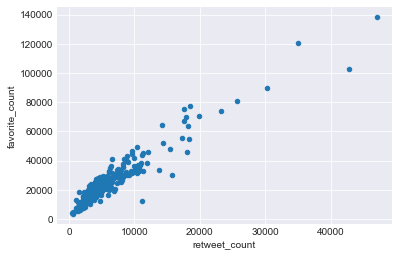

In [98]:
plt.style.use('seaborn-darkgrid')

df_clean2.plot(x = 'retweet_count', y = 'favorite_count', kind = 'scatter')

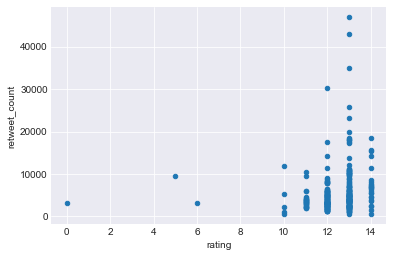

In [99]:
df_clean2.plot(x = 'rating', y = 'retweet_count', kind = 'scatter')

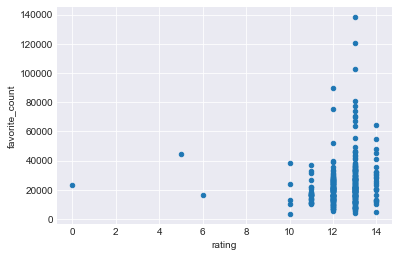

In [100]:
import matplotlib.pyplot as plt


df_clean2.plot(x = 'rating', y = 'favorite_count', kind = 'scatter')


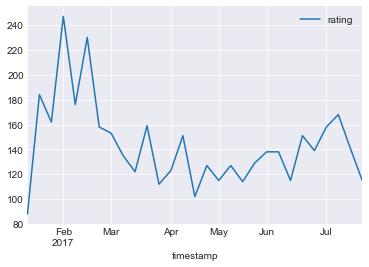

In [118]:

df_time = df_clean2.set_index('timestamp')
#df_clean2.plot(x=df_clean2.favorite_count, y= df_clean2.day_of_week, kind="bar")

#plt.bar(df_time.index, df_time.retweet_count)
#plt.scatter(df_time.index, df_time.rating)
# max 2017-08-01 16:23:56
# min 2017-01-15 21:49:1
df_clean2.timestamp = df_clean2.timestamp.values.astype('<M8[D]')
#df_clean2.timestamp.hist()
#df_clean.timestamp.sort_values(ascending = True)
dftime2 = df_clean2.groupby('timestamp').sum()[['rating']]
dftime2.plot()


AttributeError: 'NoneType' object has no attribute 'update'

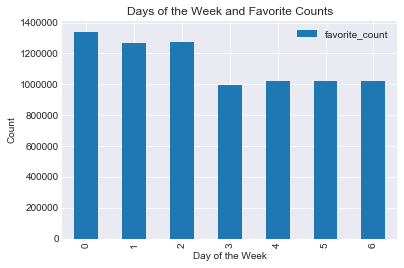

In [116]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df5 = df_clean2.groupby('day_of_week').sum()[['favorite_count']]
df5.plot(kind = 'bar')
plt.ylabel('Count')
plt.xlabel('Day of the Week')
plt.title('Days of the Week and Favorite Counts')

plt.xticks(days)

Text(0.5, 1.0, 'Retweet Counts and Ratings')

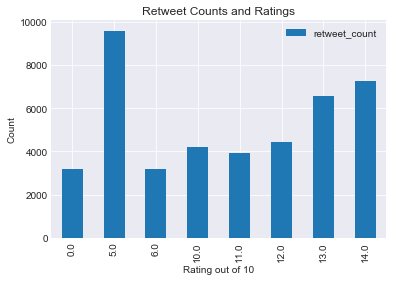

In [576]:
df2 = df_clean2.groupby('rating').mean()[['retweet_count']]
df2.plot(kind = 'bar')
plt.ylabel('Count')
plt.xlabel('Rating out of 10')
plt.title('Retweet Counts and Ratings')

In [438]:
#df4 = df_clean2[df_clean2.stage.str.contains(r'(doggo|floofer|pupper|puppo)')]

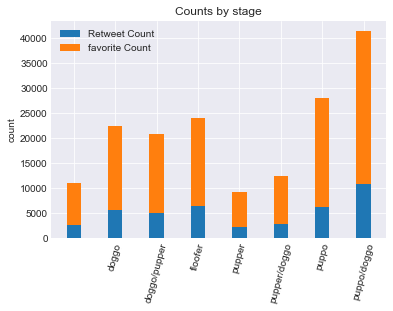

,retweet_count,favorite_count
stage,,
,2551.167447,8397.885831
doggo,5664.148649,16754.324324
doggo/pupper,5104.400000,15695.000000
floofer,6440.500000,17654.000000
pupper,2297.777293,6948.244541
pupper/doggo,2815.000000,9527.000000
puppo,6202.259259,21786.851852


In [439]:
import numpy as np
df4 = df_clean2.groupby('stage').mean()[['retweet_count', 'favorite_count']]


width = 0.35       
p1 = plt.bar(df4.index, df4.retweet_count, width)
p2 = plt.bar(df4.index, df4.favorite_count, width, bottom= df4.retweet_count)

plt.ylabel('Count')
plt.title('Retweet and Favorite Count by stage')
plt.xticks(ind, rotation=75)
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Retweet Count', 'favorite Count'))

plt.show()

df4.head(7)

In [440]:
breed = df_clean2.groupby( 'breed').count().nlargest(10, 'tweet_id')
breed.reset_index(inplace = True)
df_breed= df_clean2[df_clean2['breed'].isin(breed['breed'])]


([<matplotlib.axis.XTick at 0x2b16b1d4438>,
 <a list of 8 Text xticklabel objects>)

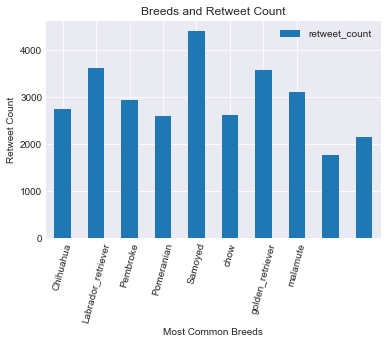

In [574]:
df_breed1 = df_breed.groupby('breed').mean()[['retweet_count']]
df_breed1.plot(kind = 'bar')
plt.xlabel('Most Common Breeds')
plt.ylabel('Retweet Count')
plt.title('Breeds and Retweet Count')
plt.xticks(ind, rotation=75)

In [442]:
df_clean2[df_clean2.retweet_count== df_clean2.retweet_count.max()]

,tweet_id,timestamp,source,expanded_urls,name,text,retweet_count,favorite_count,stage,rating,breed,day_of_week
812,744234799360020481,2016-06-18,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/744234799...,None,Here's a doggo realizing you can stand in a po...,82530,162285,doggo,13.0,Labrador_retriever,5


<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [103]:
df_clean2.groupby('rating').sum()

,retweet_count,favorite_count,day_of_week
rating,,,
0.0,3198,23317,4
5.0,9582,44586,5
6.0,3185,16688,5
10.0,21113,88390,15
11.0,106169,487404,63
12.0,527951,2454057,330
13.0,1027975,4150275,448
14.0,181262,686437,73


In [105]:
df_clean2.rating.value_counts()

13.0    157
12.0    119
11.0     27
14.0     25
10.0      5
0.0       1
6.0       1
5.0       1
Name: rating, dtype: int64